In [3]:
!pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 44.7 MB/s eta 0:00:00


In [4]:
pip install rasterio matplotlib numpy

In [5]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In Copernicus Sentinel-2 satellite data, there are indeed 13 bands. Here's a concise description of each band in one line:

1. Band 1 (Coastal Aerosol): Captures atmospheric aerosols and water quality particularly useful for monitoring coastal zones.
2. Band 2 (Blue): Provides information on shallow water bodies, vegetation, and land-water boundaries.
3. Band 3 (Green): Sensitive to chlorophyll content in vegetation and useful for monitoring vegetation health.
4. Band 4 (Red): Highlights vegetation, urban areas, and land cover changes with high contrast.
5. Band 5 (Red Edge 1): Detects vegetation stress, biomass, and leaf chlorophyll concentration variations.
6. Band 6 (Red Edge 2): Useful for discriminating between different vegetation types and assessing plant vigor.
7. Band 7 (Red Edge 3): Provides additional information on vegetation health, stress, and nitrogen content.
8. Band 8 (Near-Infrared): Crucial for vegetation analysis, distinguishing between vegetation types, and monitoring soil moisture.
9. Band 8A (Narrow Near-Infrared): Offers enhanced spectral resolution for vegetation indices and land cover classification.
10. Band 9 (Water Vapor): Measures atmospheric water vapor content and aids in atmospheric correction.
11. Band 10 (SWIR-Cirrus): Captures thin cloud cover and atmospheric haze, allowing for more accurate surface reflectance estimation.
12. Band 11 (Shortwave Infrared 1): Detects moisture content in soil, geological features, and lava flows.
13. Band 12 (Shortwave Infrared 2): Provides information on soil composition, rock types, and geological mapping.
These bands collectively provide comprehensive data for various applications, including land cover classification, vegetation monitoring, water quality assessment, and disaster management.

In [7]:
image_paths = [
    "/content/drive/MyDrive/Satellite/Raw/2024-02-06-00_00_2024-02-06-23_59_Sentinel-2_L2A_B01_(Raw).tiff",
    "/content/drive/MyDrive/Satellite/Raw/2024-02-06-00_00_2024-02-06-23_59_Sentinel-2_L2A_B02_(Raw).tiff",
    "/content/drive/MyDrive/Satellite/Raw/2024-02-06-00_00_2024-02-06-23_59_Sentinel-2_L2A_B03_(Raw).tiff",
    "/content/drive/MyDrive/Satellite/Raw/2024-02-06-00_00_2024-02-06-23_59_Sentinel-2_L2A_B04_(Raw).tiff",
    "/content/drive/MyDrive/Satellite/Raw/2024-02-06-00_00_2024-02-06-23_59_Sentinel-2_L2A_B05_(Raw).tiff",
    "/content/drive/MyDrive/Satellite/Raw/2024-02-06-00_00_2024-02-06-23_59_Sentinel-2_L2A_B06_(Raw).tiff",
    "/content/drive/MyDrive/Satellite/Raw/2024-02-06-00_00_2024-02-06-23_59_Sentinel-2_L2A_B07_(Raw).tiff",
    "/content/drive/MyDrive/Satellite/Raw/2024-02-06-00_00_2024-02-06-23_59_Sentinel-2_L2A_B08_(Raw).tiff",
    "/content/drive/MyDrive/Satellite/Raw/2024-02-06-00_00_2024-02-06-23_59_Sentinel-2_L2A_B8A_(Raw).tiff",
    "/content/drive/MyDrive/Satellite/Raw/2024-02-06-00_00_2024-02-06-23_59_Sentinel-2_L2A_B09_(Raw).tiff",
    "/content/drive/MyDrive/Satellite/Raw/2024-02-06-00_00_2024-02-06-23_59_Sentinel-2_L2A_B11_(Raw).tiff",
    "/content/drive/MyDrive/Satellite/Raw/2024-02-06-00_00_2024-02-06-23_59_Sentinel-2_L2A_B12_(Raw).tiff",
]


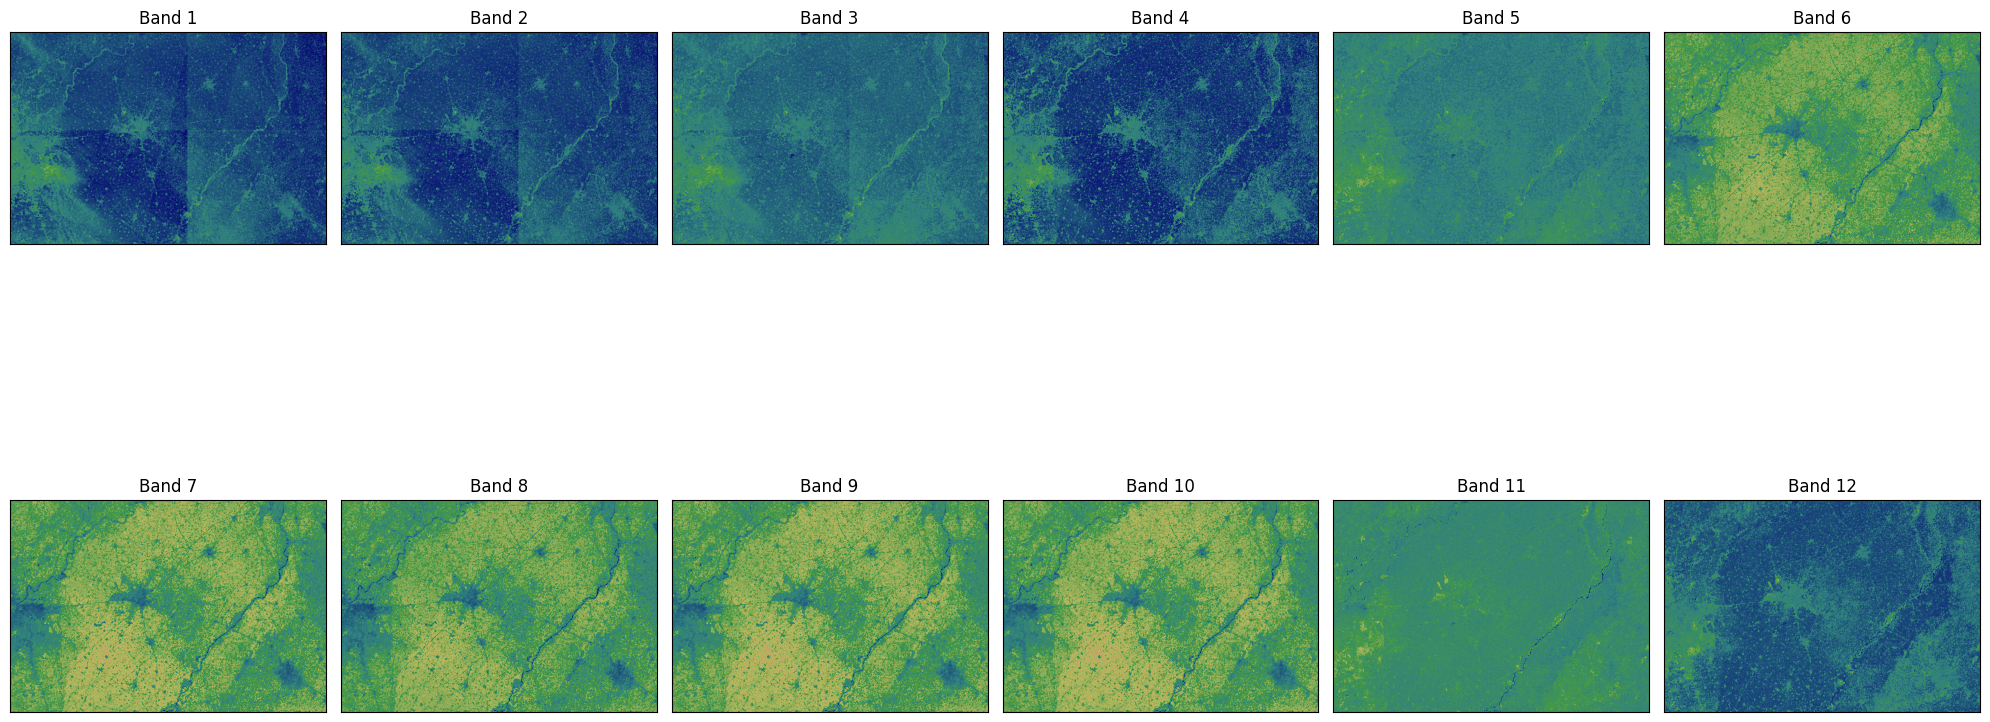

In [8]:
l = []
for i in image_paths:
    with rasterio.open(i, 'r') as f:
        l.append(f.read(1))
arr_st = np.stack(l)
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

In [9]:
len(l)

12

In [28]:
l[11].shape

(420, 625)

PERMUTATION

In [11]:
import math

def permutation(n, r):
    return math.factorial(n) / math.factorial(n - r)
p_sum = sum(permutation(12, r) for r in range(1, 13))
print(p_sum)


1302061344.0


COMBINATION

In [12]:
import math

def combination(n, r):
    return math.factorial(n) / (math.factorial(n - r) * math.factorial(r))
c_sum = sum(combination(12, r) for r in range(1, 13))
print(c_sum)

4095.0


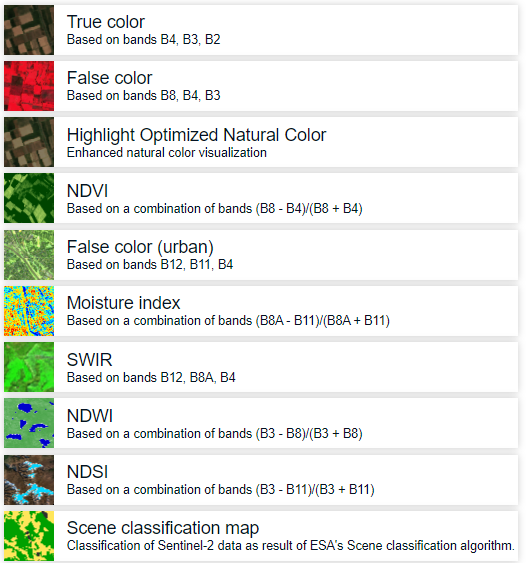

TRUE COLOR IMAGE

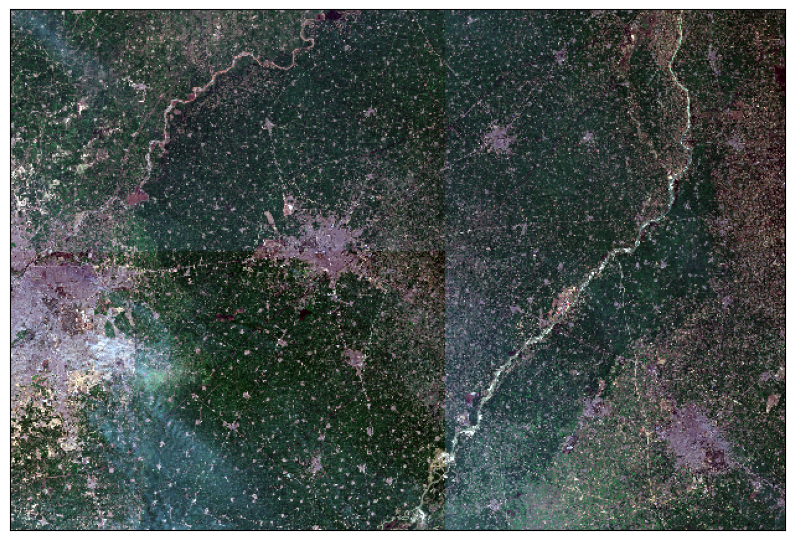

In [13]:
rgb = ep.plot_rgb(arr_st,
                  rgb=(3,2,1),
                  figsize=(10, 16),
                  stretch=True,
                  str_clip=0.2)
plt.show()

FALSE COLOR

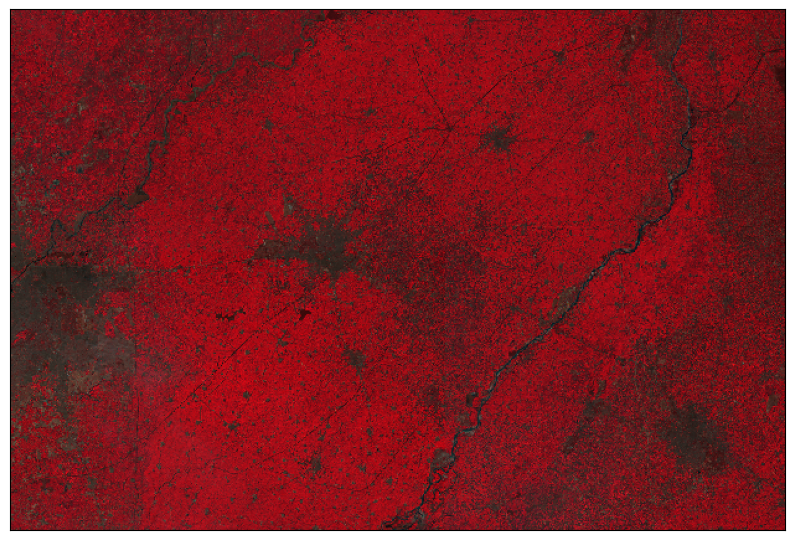

In [14]:
false = ep.plot_rgb(arr_st,
                  rgb=(7,3,2),
                  figsize=(10, 16)
                  )
plt.show()

NDVI

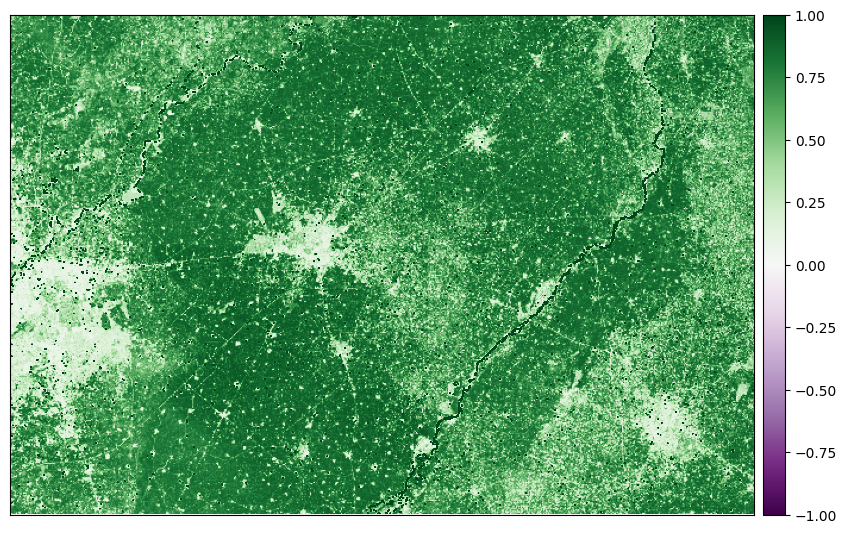

In [16]:
ndvi = es.normalized_diff(arr_st[7], arr_st[3])
ep.plot_bands(ndvi,cmap="PRGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

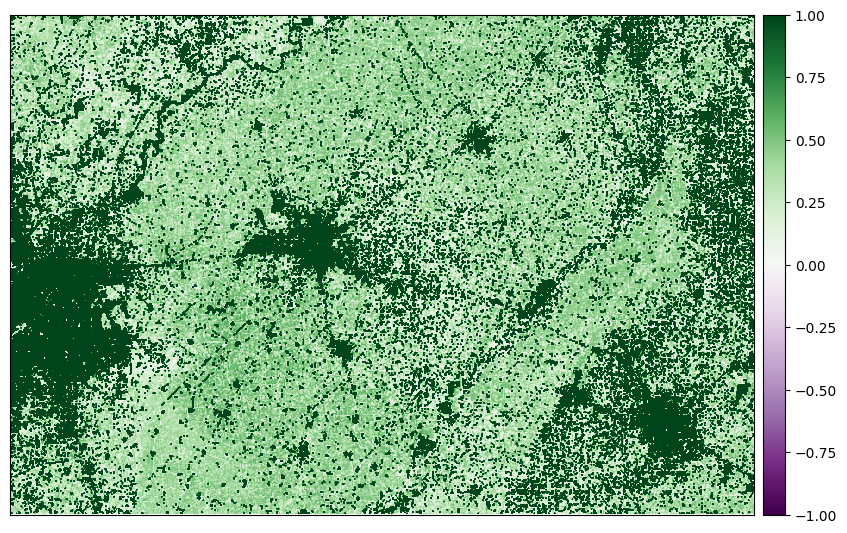

In [17]:
vari = (arr_st[2] - arr_st[3])/ (arr_st[2] + arr_st[3] - arr_st[1])

ep.plot_bands(vari, cmap="PRGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

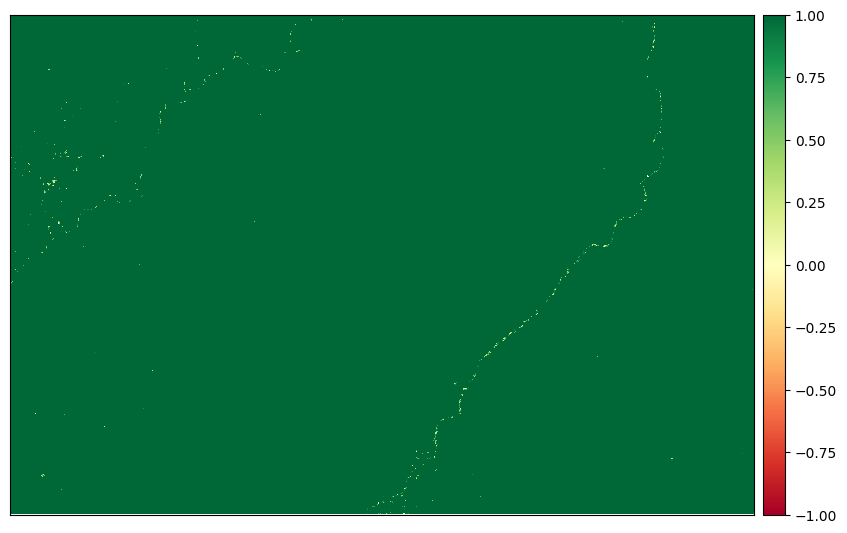

In [18]:
NDSI = es.normalized_diff(arr_st[2], arr_st[10])

ep.plot_bands(NDSI, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

MOISTURE INDEX

/usr/local/lib/python3.10/dist-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in divide
  n_diff = (b1 - b2) / (b1 + b2)


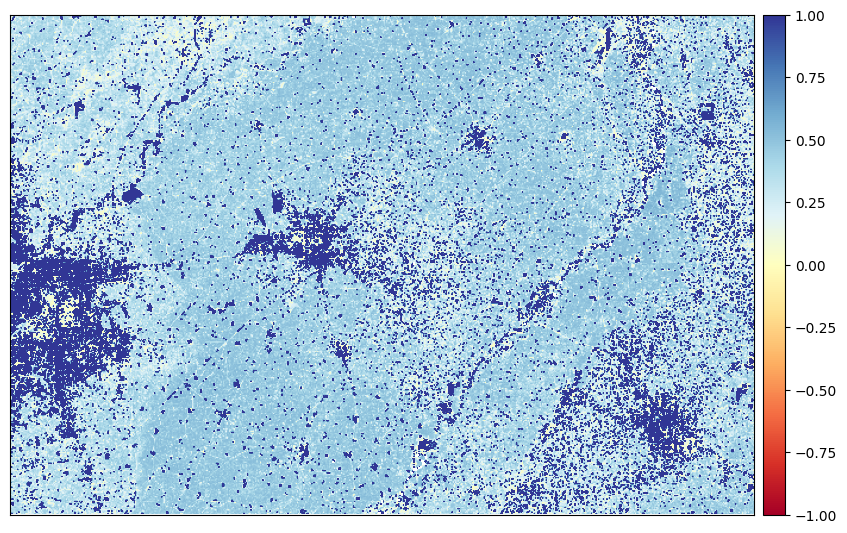

In [19]:
ndmi = es.normalized_diff(arr_st[8], arr_st[10])

ep.plot_bands(ndmi, cmap="RdYlBu", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

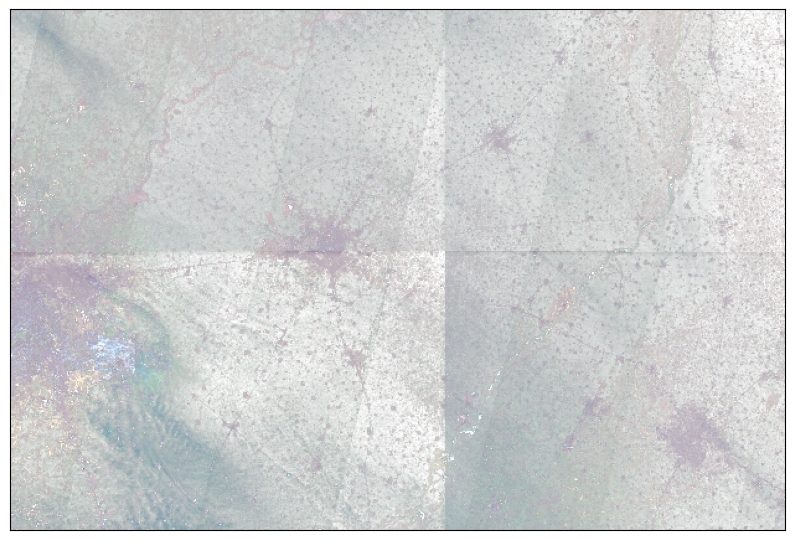

In [24]:
rgb = ep.plot_rgb(arr_st,
                  rgb=(3,2,1,0),
                  figsize=(10, 16),
                  stretch=True,
                  str_clip=0.2)
plt.show()

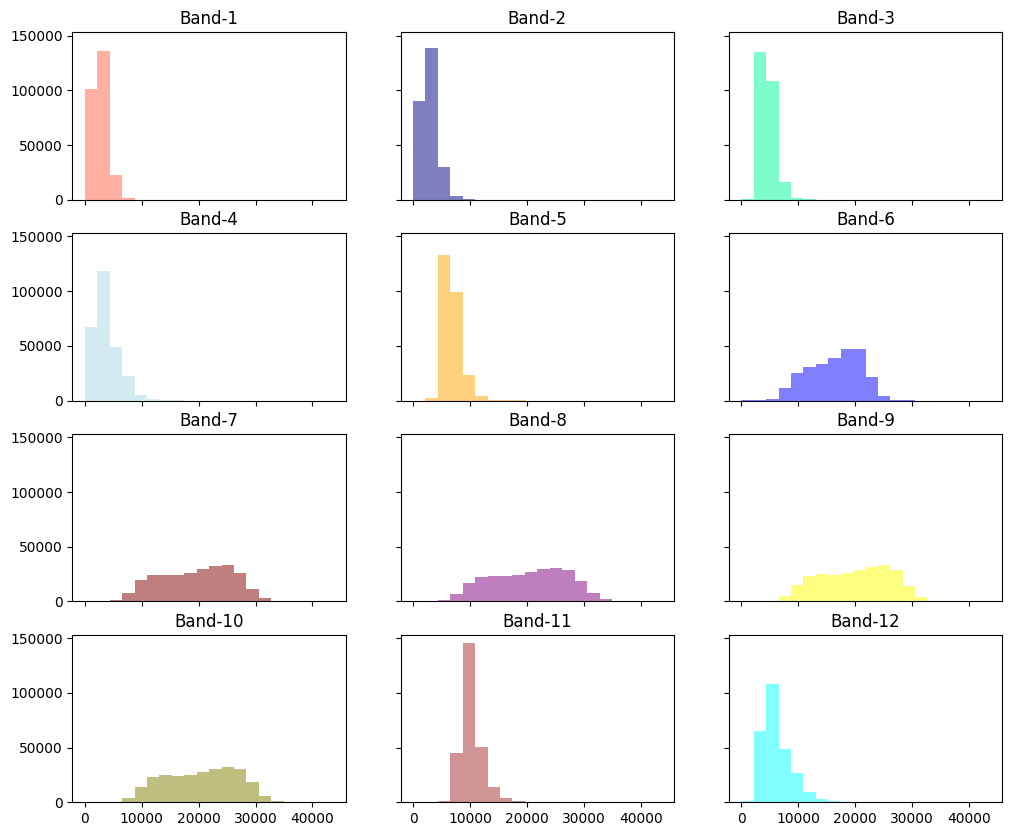

In [15]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']
ep.hist(arr_st,
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)],
        cols=3,
        alpha=0.5,
        figsize = (12, 10)
        )

plt.show()